In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [6]:
data=pd.read_csv('EastWestAirlines1.csv')

In [7]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [9]:
data.shape

(3999, 12)

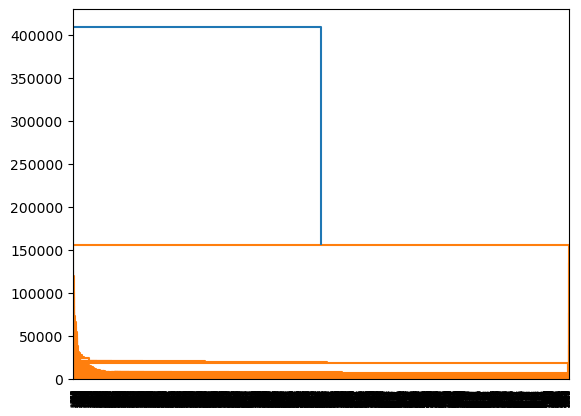

In [11]:
dendogram=sch.dendrogram(sch.linkage(data,method='single'))

In [27]:
### hierarchical clustring
cluster_h=AgglomerativeClustering(n_clusters=50,affinity = 'euclidean', linkage = 'single')

In [28]:
y_h=cluster_h.fit_predict(data)

C:\Users\khsan\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [29]:
cluster=pd.DataFrame(y_h,columns=['cluster'])

In [30]:
data['H_cluster']=cluster

In [31]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [32]:
data['H_cluster'].value_counts()

0     3927
7        5
5        4
1        4
2        3
3        3
10       3
4        3
11       3
21       2
22       2
24       2
14       1
12       1
15       1
8        1
23       1
49       1
18       1
9        1
16       1
32       1
46       1
30       1
20       1
48       1
38       1
19       1
26       1
25       1
44       1
42       1
43       1
39       1
40       1
31       1
47       1
27       1
34       1
28       1
37       1
35       1
36       1
41       1
13       1
33       1
29       1
45       1
17       1
6        1
Name: H_cluster, dtype: int64

In [33]:
#kmeans clustring


In [34]:
kmean_c=KMeans(n_clusters=8)

In [35]:
kmean_c.fit_transform(data)

C:\Users\khsan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[  11645.6675675 ,  203250.29521989, 1261377.77175619, ...,
         702985.76264138,   78739.30301779,  109098.26892823],
       [   7054.32146821,  212007.64622928, 1270271.29868773, ...,
         711846.52716038,   84035.91076025,  117734.15001062],
       [  22897.05283515,  189557.91481401, 1248056.2451776 , ...,
         689482.4181389 ,   68601.10755017,   95330.67554458],
       ...,
       [  58124.5569625 ,  155022.28851116, 1215421.91528193, ...,
         655835.65887134,   39972.36242235,   60453.87284298],
       [  36510.62577264,  176950.88084801, 1234645.32589744, ...,
         676331.15391072,   67151.60732758,   83374.98419034],
       [  17203.22999503,  228082.86564439, 1286519.06794241, ...,
         728053.32287885,   95326.77181764,  133666.36408995]])

In [37]:
lable=kmean_c.labels_

In [38]:
kmean_c_lable=pd.DataFrame(lable)

In [39]:
data['cluster']=kmean_c_lable

In [40]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_cluster,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,3


In [42]:
data['cluster'].value_counts()

0    1913
3     977
7     528
6     242
1     232
4      80
5      22
2       5
Name: cluster, dtype: int64

In [ ]:
#### using db scan 
